In [1]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

In [2]:
share_num = 200000
max_cvar = -0.01 * share_num

# MC Simulation

In [6]:
# Use monte carlo to simulate the expected utility of always buy without hiring the expert

price_0 = np.random.normal(0.0025, 0.00327, 100000)
price_1 = np.random.normal(price_0, 0.00327, 100000)
price_2 = np.random.normal(price_1, 0.00327, 100000)
price_3 = np.random.normal(price_2, 0.00327, 100000)

# Convert log returns to actual price ratios and calculate profit
price_ratios = np.exp(price_0) * np.exp(price_1) * np.exp(price_2) * np.exp(price_3)
profit = price_ratios - 1  # (final_price/initial_price - 1)
profit = profit * share_num  # Scale up to the number of shares

# Calculate CVaR (cvar) as the mean of the worst 5% of outcomes
percentile_5 = np.percentile(profit, 5)
tail_values = profit[profit <= percentile_5]
cvar = np.mean(tail_values)  # This is CVaR

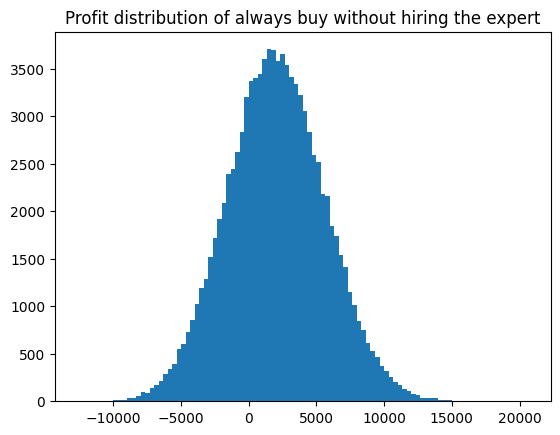

In [7]:
# plot the profit distribution
plt.title('Profit distribution of always buy without hiring the expert')
plt.hist(profit, bins=100)
plt.show()

In [8]:
# calculate the expected utility without risk
profit.mean()

2046.1456423390991

In [9]:
# calculate the expected utility with risk
print('cvar is', cvar)
print('Maximum allowable cvar is', max_cvar)
if cvar < max_cvar:
    print('Risk is too high, the expected utility is 0')
else:
    expected_utility = profit.mean()
    print(expected_utility)

cvar is -5297.994614341095
Maximum allowable cvar is -2000.0
Risk is too high, the expected utility is 0


In [10]:
# Conclusion: always buy is too risky, the expected utility is 0

In [25]:
# Use monte carlo to simulate the expected utility of buy with expert

price_0 = np.random.normal(0.0025, 0.00327, 100000)
price_1 = np.random.normal(price_0, 0.00327, 100000)
price_2 = np.random.normal(price_1, 0.00327, 100000)
price_3 = np.random.normal(price_2, 0.00327, 100000)

def find_risk_and_profit(price_0, price_1, price_2, price_3, threshold=0.0028):
  dist_len = len(price_0)
  price_estimate = np.ones(dist_len) * 0.0001

  price_ratios = np.exp(price_0) * np.exp(price_1) * np.exp(price_2) * np.exp(price_3)
  potential_profit = price_ratios - 1  # (final_price/initial_price - 1)
  potential_profit = potential_profit * share_num  # Scale up to the number of shares

  profit = np.where(price_estimate > threshold, potential_profit, 0)

  # the actual investment profit is the array of actually realized investment profits
  # so everytime price estimate is too much and we decidee not to go with the investment
  # the return should be ignored
  # so only accounting for the times when we actually invest
  # Create mask of where we actually invest based on price estimate
  investment_mask = price_estimate > threshold

  # Only include profits where we actually invested
  actual_investment_profit = potential_profit[investment_mask]

  # Calculate CVaR (cvar) as the mean of the worst 5% of outcomes
  percentile_5 = np.percentile(actual_investment_profit, 5)
  tail_values = actual_investment_profit[actual_investment_profit <= percentile_5]
  cvar = np.mean(tail_values)  # This is CVaR

  actual_profit = profit - 1000  # Cost of hiring the expert
  return potential_profit, profit, cvar, actual_profit

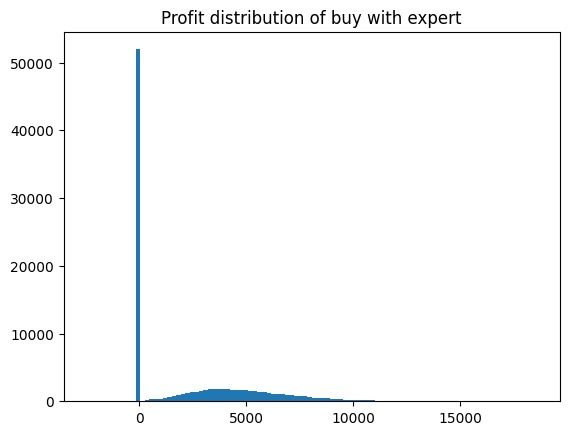

In [12]:
# plot the profit distribution
plt.title('Profit distribution of buy with expert')
plt.hist(profit, bins=100)
plt.show()

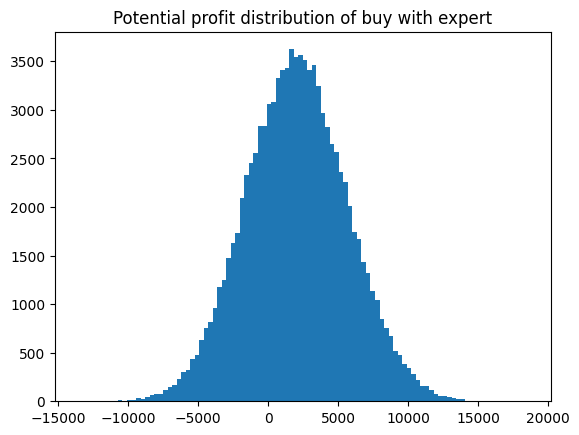

In [13]:
# plot the potential profit distribution
plt.title('Potential profit distribution of buy with expert')
plt.hist(potential_profit, bins=100)
plt.show()

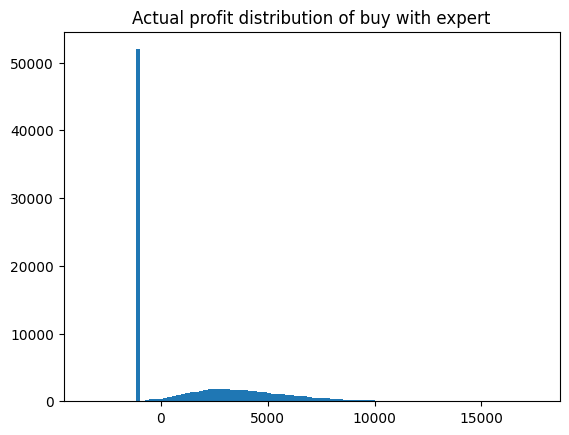

In [14]:
# plot the actual profit distribution
plt.title('Actual profit distribution of buy with expert')
plt.hist(actual_profit, bins=100)
plt.show()

In [15]:
# calculate the expected utility without risk
actual_profit.mean()

1338.1297351414285

In [16]:
# calculate the expected utility with risk
print('cvar is', cvar)
print('Maximum allowable cvar is', max_cvar)
if cvar < max_cvar:
    print('Risk is too high, the expected utility is 0')
else:
    expected_utility = actual_profit.mean()
    print(expected_utility)


cvar is 800.419434020549
Maximum allowable cvar is -2000.0
1338.1297351414285


In [17]:
# Use monte carlo to simulate the expected utility of buy with expert

buy_threshold = -0.05
result = []
counter = 0
while True:
    price_0 = np.random.normal(0.0025, 0.00327, 100000)
    price_1 = np.random.normal(price_0, 0.00327, 100000)
    price_2 = np.random.normal(price_1, 0.00327, 100000)
    price_3 = np.random.normal(price_2, 0.00327, 100000)
    price_estimate = np.random.normal(price_2, 0.00327 / 4, 100000)
    price_ratios = np.exp(price_0) * np.exp(price_1) * np.exp(price_2) * np.exp(price_3)
    potential_profit = price_ratios - 1  # (final_price/initial_price - 1)
    potential_profit = potential_profit * share_num  # Scale up to the number of shares
    profit = np.where(price_estimate > buy_threshold, potential_profit, 0)
    # the actual investment profit is the array of actually realized investment profits
    # so everytime price estimate is too much and we decidee not to go with the investment
    # the return should be ignored
    # so only accounting for the times when we actually invest
    # Create mask of where we actually invest based on price estimate
    investment_mask = price_estimate > buy_threshold
    # Only include profits where we actually invested
    # Only include profits where we actually invested
    actual_investment_profit = potential_profit[investment_mask]

    # Calculate CVaR (cvar) as the mean of the worst 5% of outcomes
    percentile_5 = np.percentile(actual_investment_profit, 5)
    tail_values = actual_investment_profit[actual_investment_profit <= percentile_5]
    cvar = np.mean(tail_values)  # This is CVaR

    actual_profit = profit - 1000  # Cost of hiring the expert

    if cvar < max_cvar:
        expected_utility = 0
    else:
        expected_utility = actual_profit.mean()

    # print('buy_threshold is', buy_threshold)
    # print('cvar is', cvar)
    # print('Maximum allowable cvar is', max_cvar)
    # print('expected utility is', expected_utility)

    buy_threshold += 0.0001

    if buy_threshold > 0.023:
        break


In [18]:
# Use monte carlo to simulate the expected utility of buy with expert

price_0 = np.random.normal(0.0025, 0.00327, 100000)
price_1 = np.random.normal(price_0, 0.00327, 100000)
price_2 = np.random.normal(price_1, 0.00327, 100000)
price_3 = np.random.normal(price_2, 0.00327, 100000)

price_estimate = np.random.normal(price_2, 0.00327 / 4, 100000)

price_ratios = np.exp(price_0) * np.exp(price_1) * np.exp(price_2) * np.exp(price_3)
potential_profit = price_ratios - 1  # (final_price/initial_price - 1)
potential_profit = potential_profit * share_num  # Scale up to the number of shares

profit = np.where(price_estimate > 0.023, potential_profit, 0)

# the actual investment profit is the array of actually realized investment profits
# so everytime price estimate is too much and we decidee not to go with the investment
# the return should be ignored
# so only accounting for the times when we actually invest
# Create mask of where we actually invest based on price estimate
investment_mask = price_estimate > 0.0028

# Only include profits where we actually invested
actual_investment_profit = potential_profit[investment_mask]

# Calculate CVaR (cvar) as the mean of the worst 5% of outcomes
percentile_5 = np.percentile(actual_investment_profit, 5)
tail_values = actual_investment_profit[actual_investment_profit <= percentile_5]
cvar = np.mean(tail_values)  # This is CVaR

actual_profit = profit - 1000  # Cost of hiring the expert

print(actual_profit.mean())

-996.7610120867538


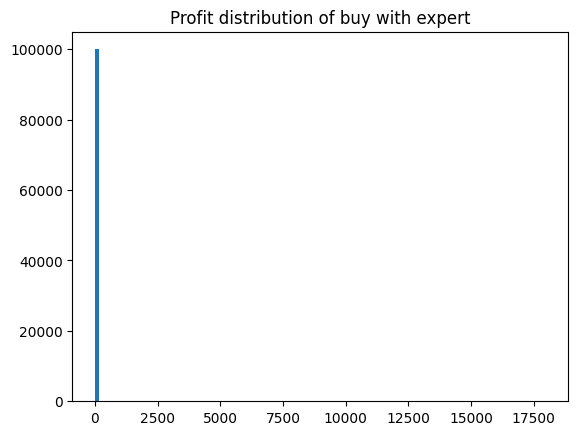

In [19]:
# plot the profit distribution
plt.title('Profit distribution of buy with expert')
plt.hist(profit, bins=100)
plt.show()


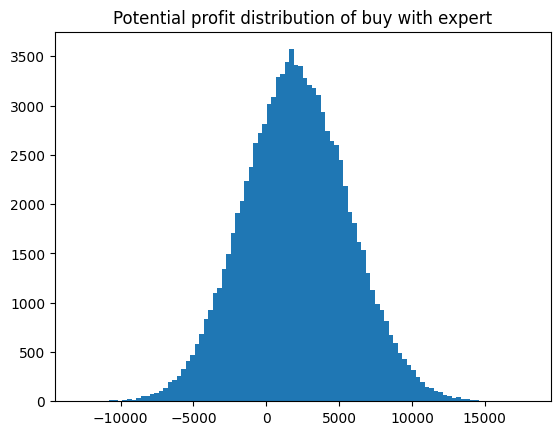

In [20]:
# plot the potential profit distribution
plt.title('Potential profit distribution of buy with expert')
plt.hist(potential_profit, bins=100)
plt.show()

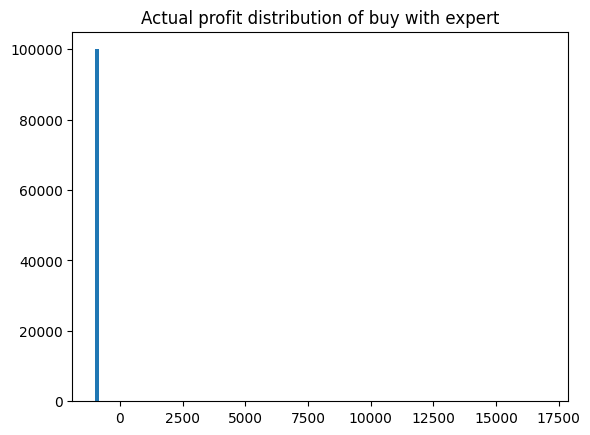

In [21]:
# plot actual profit distribution
plt.title('Actual profit distribution of buy with expert')
plt.hist(actual_profit, bins=100)
plt.show()

In [22]:
# Use monte carlo to simulate the expected utility of buy with expert
buy_threshold = -0.02
result = []
counter = 0
while True:
    for i in range(10):
        price_0 = np.random.normal(0.0025, 0.00327, 100000)
        price_1 = np.random.normal(price_0, 0.00327, 100000)
        price_2 = np.random.normal(price_1, 0.00327, 100000)
        price_3 = np.random.normal(price_2, 0.00327, 100000)

        price_estimate = np.random.normal(price_2, 0.00327 / 4, 100000)

        price_ratios = np.exp(price_0) * np.exp(price_1) * np.exp(price_2) * np.exp(price_3)
        potential_profit = price_ratios - 1  # (final_price/initial_price - 1)
        potential_profit = potential_profit * share_num  # Scale up to the number of shares

        profit = np.where(price_estimate > buy_threshold, potential_profit, 0)

        # the actual investment profit is the array of actually realized investment profits
        # so everytime price estimate is too much and we decidee not to go with the investment
        # the return should be ignored
        # so only accounting for the times when we actually invest
        # Create mask of where we actually invest based on price estimate
        investment_mask = price_estimate > buy_threshold

        # Only include profits where we actually invested
        actual_investment_profit = potential_profit[investment_mask]

        # Calculate CVaR (cvar) as the mean of the worst 5% of outcomes
        percentile_5 = np.percentile(actual_investment_profit, 5)
        tail_values = actual_investment_profit[actual_investment_profit <= percentile_5]
        cvar = np.mean(tail_values)  # This is CVaR

        actual_profit = profit - 1000  # Cost of hiring the expert

        # calculate the expected utility with risk
        if cvar < max_cvar:
            expected_utility = 0
        else:
            expected_utility = actual_profit.mean()

        result.append([buy_threshold, expected_utility])

    counter += 1
    buy_threshold += 0.0001

    if buy_threshold > 0.023:
        break


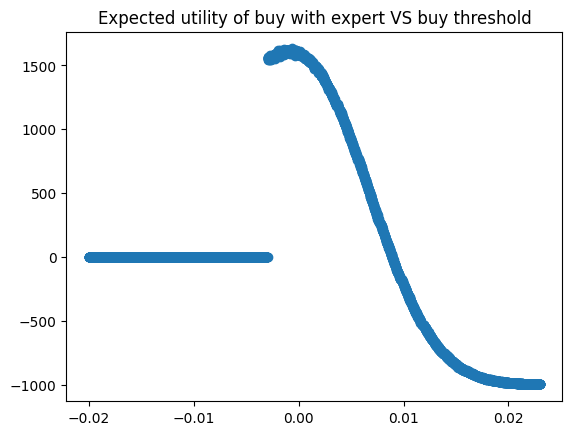

In [23]:
# plot the result as a list of [x, y] pairs
result = np.array(result)

plt.title('Expected utility of buy with expert VS buy threshold')

# plot it as a scatter plot
plt.scatter(result[:, 0], result[:, 1])
plt.show()

# take the average of y values for each x value
unique_xs = np.unique(result[:, 0])




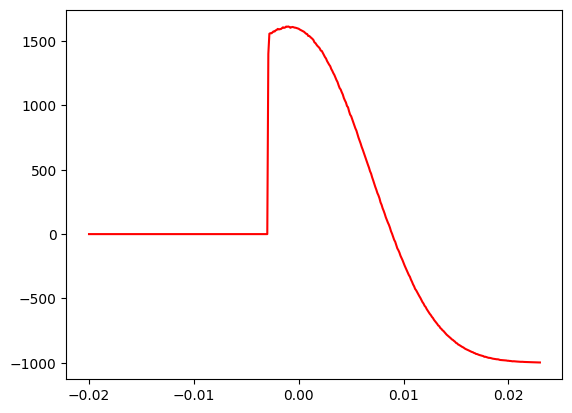

In [24]:
import pandas as pd

df = pd.DataFrame(result, columns=['x', 'y'])

# take the average of y values for each x value
averages = df.groupby('x').mean()

# plot the averages
plt.plot(averages.index, averages['y'], color='red')
plt.show()

In [25]:
# find the x value that maximizes y
max_y = averages['y'].max()
max_x = averages[averages['y'] == max_y].index[0]

print('Maximum expected utility is', max_y, 'when buy threshold is', max_x)


Maximum expected utility is 1613.4431927299324 when buy threshold is -0.0010000000000000664


# MCMC Simulation

In [3]:
rsi_observed = 58.68
ma50_observed = np.log(0.3772)
expert_subj_opinion_observed = 0.0001

In [55]:
model = pm.Model()

ma50_mu = lambda price_1: price_1**2 * -0.26440215 + price_1 * 0.00093349 + 0.00223102
ma50_sigma = lambda price_1: price_1**2 * -0.03285663 + price_1 * -0.00210371 + 0.0045002

rsi_mu = lambda price_1: price_1**2 * -507.22185239 + price_1 * 3.91384377 + 55.87459884
rsi_sigma = lambda price_1: price_1**2 * -156.09564645 + price_1 * -2.90971536 + 9.42581689

with model:
  # Define day 0 variables
  price_0 = pm.Normal("Price 0", mu=0.0025, sigma=0.00327, observed=-0.00594693641)

  # Define day 1 variables
  price_1 = pm.Normal("Price 1", mu=price_0, sigma=0.00327)
  # rsi_1 = pm.Normal("RSI", mu=rsi_mu(price_1), sigma=rsi_sigma(price_1))#, observed=rsi_observed) # Given an observation N, enter "observed=N" as a parameter
  ma50_1 = pm.Normal("MA50", mu=ma50_mu(price_1), sigma=ma50_sigma(price_1), observed=ma50_observed) # Given an observation N, enter "observed=N" as a parameter

  # Define day 2 variables
  price_2 = pm.Normal("Price 2", mu=price_1, sigma=0.00327)
  expert_subj_opinion_2 = pm.Normal("Expert Opinion", mu=price_2, sigma=0.00327/4, observed=expert_subj_opinion_observed) # Given an observation N, enter "observed=N" as a parameter

  # Define day 3 variables
  price_3 = pm.Normal("Price 3", mu=price_2, sigma=0.00327)

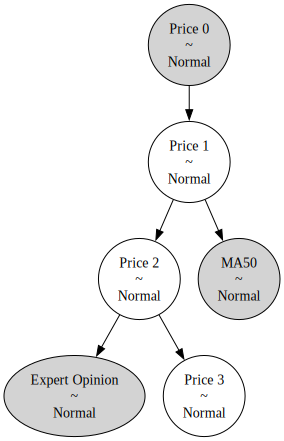

In [56]:
pm.model_to_graphviz(model)

In [57]:
with model:
  trace = pm.sample(draws=20000, tune=1000, chains=4, random_seed=0, cores=16)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 16 jobs)
NUTS: [Price 1, Price 2, Price 3]


Sampling 4 chains for 1_000 tune and 20_000 draw iterations (4_000 + 80_000 draws total) took 24 seconds.


In [28]:
# check the mu and sigma values for all possible variables
az.summary(trace)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Price 0,-0.012,0.002,-0.017,-0.008,0.0,0.0,108159.0,69109.0,1.0
Price 1,-0.027,0.001,-0.030,-0.025,0.0,0.0,105304.0,68703.0,1.0
Price 2,-0.002,0.001,-0.003,-0.000,0.0,0.0,99034.0,65392.0,1.0
Price 3,-0.002,0.003,-0.008,0.005,0.0,0.0,107202.0,68124.0,1.0


In [58]:
# Use monte carlo to simulate the expected utility of buy with expert

# price_0 = np.random.normal(0.0025, 0.00327, 100000)
# price_1 = np.random.normal(price_0, 0.00327, 100000)
# price_2 = np.random.normal(price_1, 0.00327, 100000)
# price_3 = np.random.normal(price_2, 0.00327, 100000)


price_1 = trace['posterior']['Price 1'][0,:]
price_2 = trace['posterior']['Price 2'][0,:]
price_3 = trace['posterior']['Price 3'][0,:]

price_0 = np.ones(price_1.shape[0]) * -0.00594693641

price_estimate = np.ones(price_0.shape[0]) * 0.0001

price_ratios = np.exp(price_0) * np.exp(price_1) * np.exp(price_2) * np.exp(price_3)
potential_profit = price_ratios - 1  # (final_price/initial_price - 1)
potential_profit = potential_profit * share_num  # Scale up to the number of shares

profit = np.where(price_estimate > -0.0007, potential_profit, 0)

# the actual investment profit is the array of actually realized investment profits
# so everytime price estimate is too much and we decidee not to go with the investment
# the return should be ignored
# so only accounting for the times when we actually invest
# Create mask of where we actually invest based on price estimate
investment_mask = price_estimate > -0.0007

# Only include profits where we actually invested
actual_investment_profit = potential_profit[investment_mask]

actual_profit = profit - 1000  # Cost of hiring the expert


# Calculate CVaR (cvar) as the mean of the worst 5% of outcomes from the actual profit
percentile_5 = np.percentile(actual_profit, 5)
tail_values = actual_profit[actual_profit <= percentile_5]
cvar = np.mean(tail_values)  

# Calculate CVaR fron the actual investment profit
percentile_5 = np.percentile(actual_investment_profit, 5)
tail_values = actual_investment_profit[actual_investment_profit <= percentile_5]
cvar_investment = np.mean(tail_values)

print("cvar_investment", cvar_investment)

cvar_investment <xarray.DataArray ()>
array(-8508.34417588)
Coordinates:
    chain    int32 0


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Price 0,-0.012,0.002,-0.017,-0.008,0.0,0.0,108159.0,69109.0,1.0
Price 1,-0.027,0.001,-0.030,-0.025,0.0,0.0,105304.0,68703.0,1.0
Price 2,-0.002,0.001,-0.003,-0.000,0.0,0.0,99034.0,65392.0,1.0
Price 3,-0.002,0.003,-0.008,0.005,0.0,0.0,107202.0,68124.0,1.0


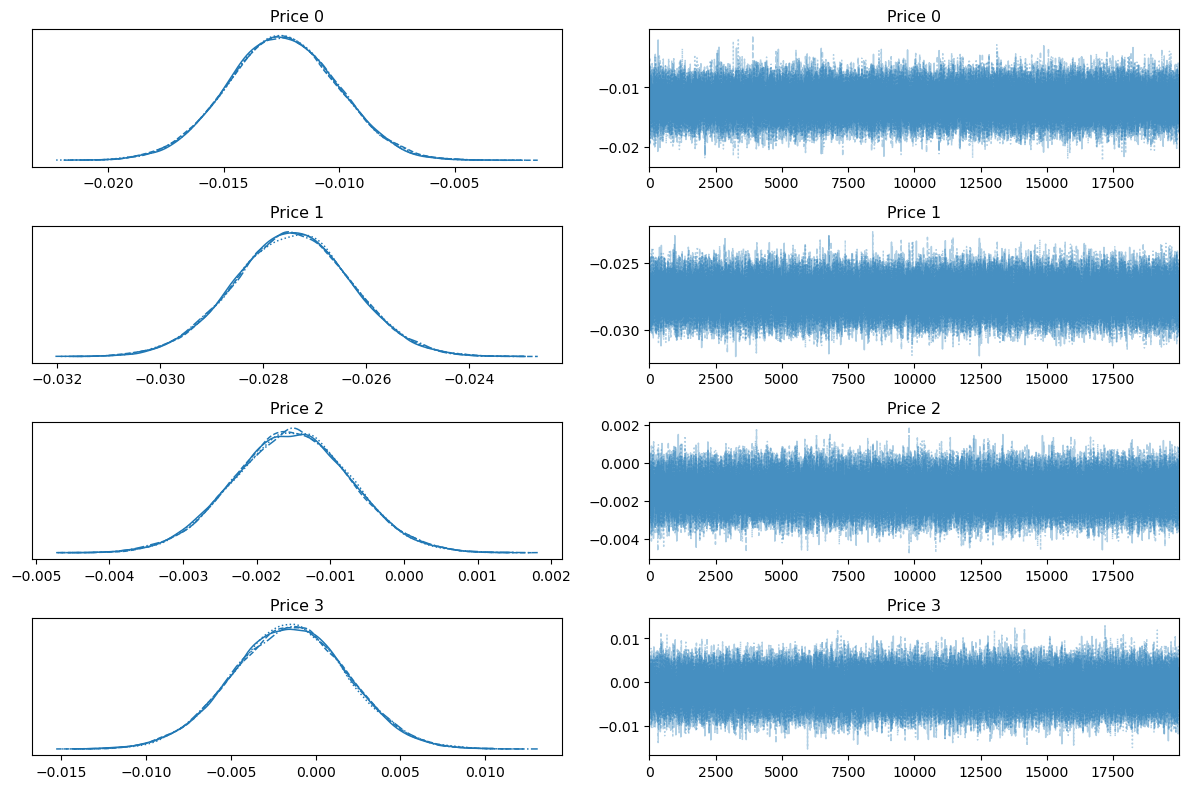

In [7]:
with model:
  display(az.summary(trace))
  az.plot_trace(trace)
  plt.tight_layout()

In [23]:
price_0 = trace['posterior']['Price 0'][0,:]
price_1 = trace['posterior']['Price 1'][0,:]
price_2 = trace['posterior']['Price 2'][0,:]
price_3 = trace['posterior']['Price 3'][0,:]

dimension = price_0.shape

price_estimate = trace['observed_data']['Expert Opinion']


In [ ]:
# get the length 

<xarray.DataArray 'Price 0' (draw: 20000)>
array([-0.00980305, -0.00980305, -0.01176542, ..., -0.00771094,
       -0.01311973, -0.01160987])
Coordinates:
    chain    int32 0
  * draw     (draw) int32 0 1 2 3 4 5 6 ... 19994 19995 19996 19997 19998 19999

In [26]:
potential_profit, profit, cvar, actual_profit = find_risk_and_profit(price_0, price_1, price_2, price_3, threshold=-0.0007)

In [27]:
print(cvar)

-5289.162313546847


In [ ]:
if cvar < max_cvar:
    expected_utility = 0
else:
    expected_utility = actual_profit.mean()
print(expected_utility)